# TASK 8

In [101]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import random
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report 
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
import warnings
warnings.filterwarnings("ignore")

In [53]:
L1=[]
ML=['A','B','C','D','E']
for i in ML:
    for j in ML:
        for k in ML:
            dataset=i+j+k
            L1.append(dataset)
C1=[]
for l in range(len(L1)):
    C1.append(L1[l][0])
C2=[]
for m in range(len(L1)):
    C2.append(L1[m][1])
C3=[]
for n in range(len(L1)):
    C3.append(L1[n][2])
    
combo = pd.DataFrame({'C1': C1,'C2': C2,'C3': C3})
combo

,C1,C2,C3
0,A,A,A
1,A,A,B
2,A,A,C
3,A,A,D
4,A,A,E
...,...,...,...
120,E,E,A
121,E,E,B
122,E,E,C
123,E,E,D


In [56]:
possible=0
for x in range(0,125):
    if(combo.loc[x, 'C1']==combo.loc[x, 'C2'] or combo.loc[x, 'C2']==combo.loc[x, 'C3'] or combo.loc[x, 'C1']==combo.loc[x, 'C3']):
        possible+=1
print(f"Where 2 person go to the same city is {possible}")

Where 2 person go to the same city is 65


In [59]:
print(f"The probability of the occurrence of that event is {possible/125}")
prob_ratio=possible/125

The probability of the occurrence of that event is 0.52


In [61]:
rest_prob = 1-prob_ratio
print(f"The probability of not occurrence that event is {rest_prob}")

The probability of not occurrence that event is 0.48


(array([1., 0., 0., 0., 0., 0., 0., 0., 0., 1.]),
 array([0.48 , 0.484, 0.488, 0.492, 0.496, 0.5  , 0.504, 0.508, 0.512,
        0.516, 0.52 ]),
 <BarContainer object of 10 artists>)

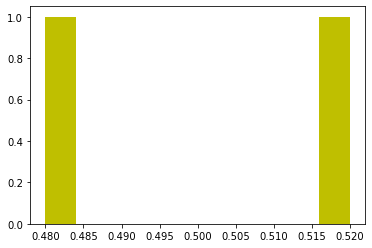

In [70]:
plt.hist([prob_ratio, rest_prob], rwidth=10, histtype = "bar",orientation='vertical', color = ["y"], label = ["Prob","Rest Prob"])

It a discrete distribution

It is a multivariate problem

# Task 1

In [114]:
df=pd.read_csv('C:\\Users\\DELL\\Downloads\\Housing.csv')

In [115]:
df

,price,area,length,width,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,1465896,244316,593,412,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,3123904,390488,734,532,4,4,4,yes,no,no,no,yes,3,no,furnished
2,1519896,379974,498,763,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,1152112,288028,382,754,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,887292,221823,503,441,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,377880,188940,470,402,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,483084,241542,497,486,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,364276,182138,374,487,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,734160,367080,570,644,3,1,1,no,no,no,no,no,0,no,furnished


In [116]:
df['area'].mean()

293234.97247706424

In [117]:
df['area'].median()

273824.0

In [118]:
df['area'].std()

113027.43454065922

# Task 2

In [119]:
lis=["mainroad","guestroom","basement","hotwaterheating","airconditioning","prefarea","furnishingstatus"]

In [120]:
df[lis]=df[lis].apply(LabelEncoder().fit_transform)

In [121]:
df

,price,area,length,width,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,1465896,244316,593,412,4,2,3,1,0,0,0,1,2,1,0
1,3123904,390488,734,532,4,4,4,1,0,0,0,1,3,0,0
2,1519896,379974,498,763,3,2,2,1,0,1,0,0,2,1,1
3,1152112,288028,382,754,4,2,2,1,0,1,0,1,3,1,0
4,887292,221823,503,441,4,1,2,1,1,1,0,1,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,377880,188940,470,402,2,1,1,1,0,1,0,0,2,0,2
541,483084,241542,497,486,3,1,1,0,0,0,0,0,0,0,1
542,364276,182138,374,487,2,1,1,1,0,0,0,0,0,0,2
543,734160,367080,570,644,3,1,1,0,0,0,0,0,0,0,0


In [122]:
X = df.drop("furnishingstatus", axis = 1)
y = df["furnishingstatus"]
X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=0.2, random_state=51)
print('Shape of X_train = ', X_train.shape)
print('Shape of y_train = ', y_train.shape)
print('Shape of X_test = ', X_test.shape)
print('Shape of y_test = ', y_test.shape)

Shape of X_train =  (436, 14)
Shape of y_train =  (436,)
Shape of X_test =  (109, 14)
Shape of y_test =  (109,)


In [123]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
pred=clf.predict(X_test)
print (pred)
clf.score(X_test,y_test)
print ("Accuracy : " , accuracy_score(y_test,pred)*100)  
print("Report : \n", classification_report(y_test, pred))
print("F1 Score : ",f1_score(y_test, pred, average='macro')*100)

[1 2 0 2 2 1 1 1 0 1 1 0 2 0 2 2 2 1 1 1 1 0 1 1 1 1 1 1 1 2 2 1 2 1 0 0 1
 0 1 0 0 2 2 1 2 0 0 1 2 1 1 0 0 0 1 1 1 1 1 1 1 2 1 1 0 1 2 2 0 1 1 1 1 0
 1 1 2 1 1 0 1 2 2 0 0 2 2 2 1 2 2 1 2 2 2 1 1 1 0 1 0 1 2 0 1 1 1 1 0]
Accuracy :  43.11926605504588
Report : 
               precision    recall  f1-score   support

           0       0.32      0.32      0.32        25
           1       0.49      0.60      0.54        45
           2       0.41      0.31      0.35        39

    accuracy                           0.43       109
   macro avg       0.41      0.41      0.40       109
weighted avg       0.42      0.43      0.42       109

F1 Score :  40.43137254901961


# Task 3

In [124]:
df2=df

In [125]:
df2['price'] = df2['price'] - df2['price'].mean()
df2['area'] = df2['area'] - df2['area'].mean()

In [126]:
df2

,price,area,length,width,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,4.071161e+05,-48918.972477,593,412,4,2,3,1,0,0,0,1,2,1,0
1,2.065124e+06,97253.027523,734,532,4,4,4,1,0,0,0,1,3,0,0
2,4.611161e+05,86739.027523,498,763,3,2,2,1,0,1,0,0,2,1,1
3,9.333213e+04,-5206.972477,382,754,4,2,2,1,0,1,0,1,3,1,0
4,-1.714879e+05,-71411.972477,503,441,4,1,2,1,1,1,0,1,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,-6.808999e+05,-104294.972477,470,402,2,1,1,1,0,1,0,0,2,0,2
541,-5.756959e+05,-51692.972477,497,486,3,1,1,0,0,0,0,0,0,0,1
542,-6.945039e+05,-111096.972477,374,487,2,1,1,1,0,0,0,0,0,0,2
543,-3.246199e+05,73845.027523,570,644,3,1,1,0,0,0,0,0,0,0,0


In [127]:
X = df2.drop("furnishingstatus", axis = 1)
y = df2["furnishingstatus"]
X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=0.2, random_state=51)
print('Shape of X_train = ', X_train.shape)
print('Shape of y_train = ', y_train.shape)
print('Shape of X_test = ', X_test.shape)
print('Shape of y_test = ', y_test.shape)

Shape of X_train =  (436, 14)
Shape of y_train =  (436,)
Shape of X_test =  (109, 14)
Shape of y_test =  (109,)


In [128]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
pred=clf.predict(X_test)
print (pred)
clf.score(X_test,y_test)
print ("Accuracy : " , accuracy_score(y_test,pred)*100)  
print("Report : \n", classification_report(y_test, pred))
print("F1 Score : ",f1_score(y_test, pred, average='macro')*100)

[1 2 2 2 2 1 1 2 0 1 1 0 2 0 2 2 2 1 1 1 0 0 1 0 1 1 1 2 1 2 2 1 2 0 0 0 1
 0 1 0 0 2 1 1 2 0 0 1 0 1 1 0 0 0 1 1 1 2 1 1 1 2 1 1 0 1 2 2 0 1 1 1 1 0
 1 1 2 1 1 0 1 1 2 2 0 2 2 2 1 2 1 1 2 2 2 1 0 1 0 1 0 0 2 0 2 1 1 1 0]
Accuracy :  43.11926605504588
Report : 
               precision    recall  f1-score   support

           0       0.31      0.36      0.33        25
           1       0.47      0.51      0.49        45
           2       0.48      0.38      0.43        39

    accuracy                           0.43       109
   macro avg       0.42      0.42      0.42       109
weighted avg       0.44      0.43      0.43       109

F1 Score :  41.708882134414054


# Task 5

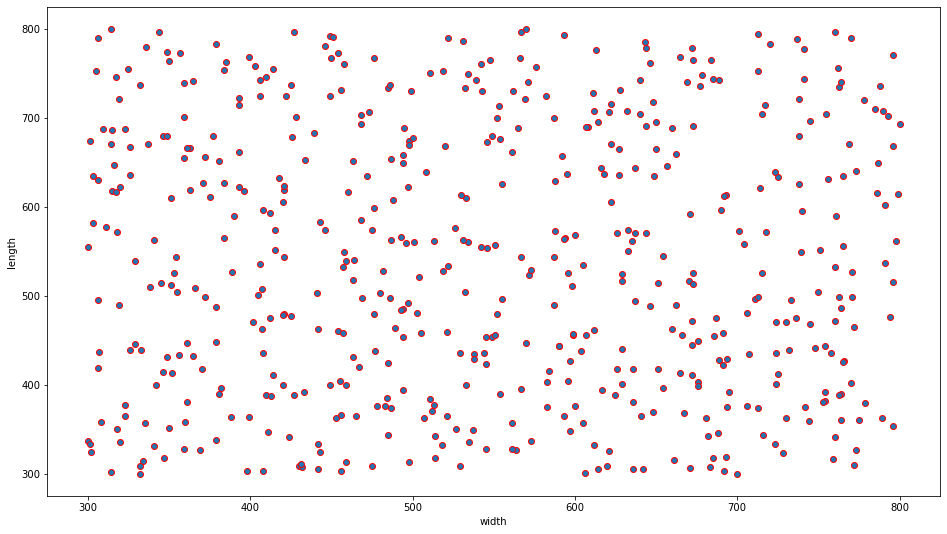

In [150]:
import numpy as np
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(16,9))
x=list(df['width'])
y=list(df['length'])
# plt.plot(x, y)
plt.scatter(x, y,cmap ='viridis', edgecolor ='red')
plt.xlabel("width")
plt.ylabel("length")
plt.show()

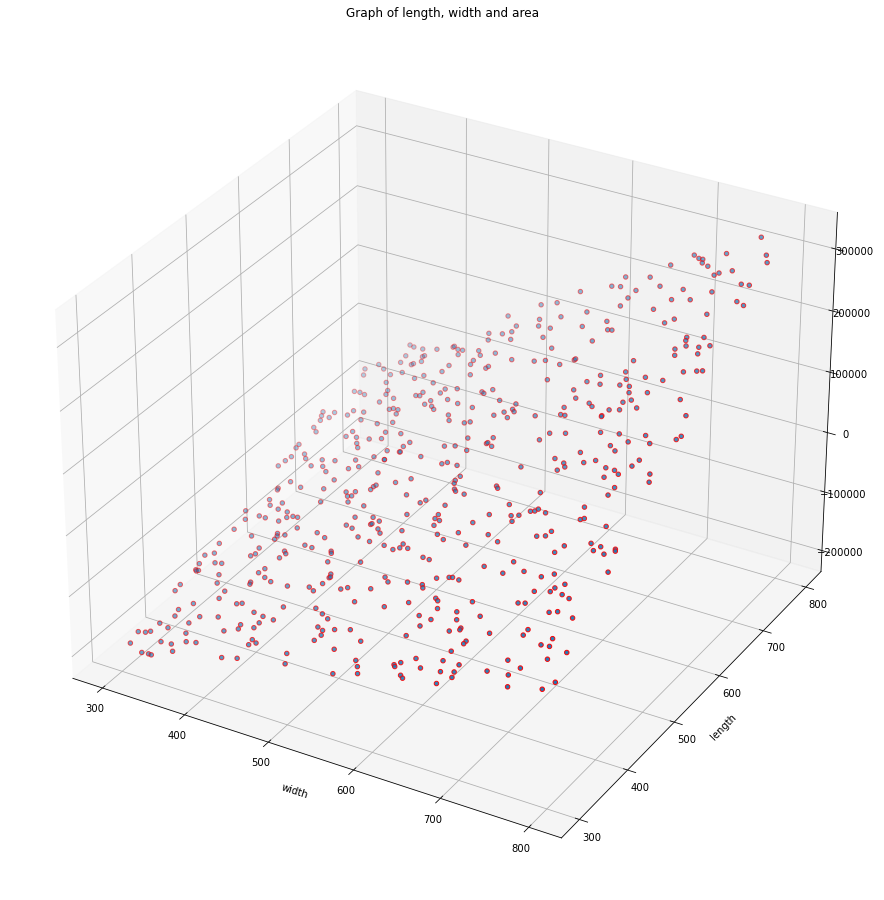

In [157]:
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(16,16))
ax = plt.axes(projection ='3d')

z = list(df['area'])
x = list(df['length'])
y = list(df['width'])

# ax.plot3D(x, y, z, 'green')
# ax.plot_surface(x, y, z, cmap ='viridis', edgecolor ='green')
ax.scatter(x, y, z,cmap ='viridis', edgecolor ='red')
ax.set_title('Graph of length, width and area')
plt.xlabel("width")
plt.ylabel("length")
# plt.zlabel("Area")
plt.show()

# Task 7

In [161]:
print(f"The co-relation of the length and area is {df['area'].corr(df['length'])}")

The co-relation of the length and area is 0.6959524284375517


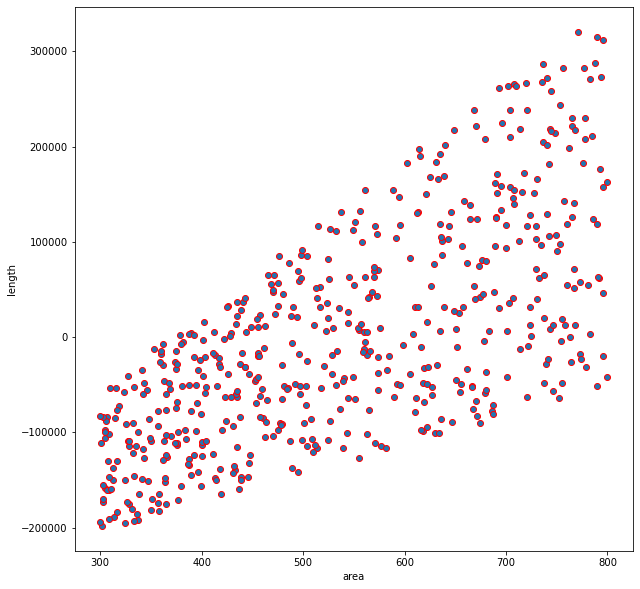

In [174]:
import numpy as np
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10,10))
x=list(df['area'])
y=list(df['length'])
# plt.plot(x, y)
plt.scatter(y, x,cmap ='black', edgecolor ='red')
plt.xlabel("area")
plt.ylabel("length")
plt.show()

# Task 6

In [159]:
df2.cov()

,price,area,length,width,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
price,4.450867e+11,4.583381e+10,4.310565e+07,3.927680e+07,165328.693915,92595.758473,428502.452199,16290.657771,9679.578703,-54998.854351,1957.561218,69790.104270,-31758.893497,2336.707555,-49329.123125
area,4.583381e+10,1.277520e+10,1.166981e+07,1.106981e+07,2824.302348,2429.217451,-47.240657,-2295.722646,-169.882960,-2791.234822,81.220015,-802.483945,-12170.047052,-2157.056024,-2169.406166
length,4.310565e+07,1.166981e+07,2.200903e+04,-4.514160e+02,7.842978,3.021725,1.111016,-2.517546,1.567701,-1.345467,-1.612858,6.304496,-3.987729,0.298934,-0.002132
width,3.927680e+07,1.106981e+07,-4.514160e+02,2.090209e+04,-0.069954,2.335486,0.790070,-1.291335,-2.176825,-3.605117,1.537962,-6.097865,-16.660719,-4.610193,-3.953842
bedrooms,1.653287e+05,2.824302e+03,7.842978e+00,-6.995413e-02,0.544738,0.138674,0.261589,-0.003096,0.022760,0.034299,0.007117,0.055140,0.088562,0.024747,-0.069256
bathrooms,9.259576e+04,2.429217e+03,3.021725e+00,2.335486e+00,0.138674,0.252476,0.142171,0.007427,0.024329,0.024501,0.007066,0.043689,0.076842,0.013532,-0.054921
stories,4.285025e+05,-4.724066e+01,1.111016e+00,7.900702e-01,0.261589,0.142171,0.752543,0.036809,0.014460,-0.071418,0.003424,0.118480,0.034043,0.016352,-0.069135
mainroad,1.629066e+04,-2.295723e+03,-2.517546e+00,-1.291335e+00,-0.003096,0.007427,0.036809,0.121546,0.012325,0.007326,-0.000860,0.017097,0.061407,0.029567,-0.041601
guestroom,9.679579e+03,-1.698830e+02,1.567701e+00,-2.176825e+00,0.022760,0.024329,0.014460,0.012325,0.146573,0.068025,-0.000826,0.024609,0.012358,0.026137,-0.034491
basement,-5.499885e+04,-2.791235e+03,-1.345467e+00,-3.605117e+00,0.034299,0.024501,-0.071418,0.007326,0.068025,0.228056,0.000438,0.010517,0.021189,0.046216,-0.041025


In [160]:
df2.corr()

,price,area,length,width,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
price,1.000000,0.607827,0.435523,0.407210,0.335762,0.276222,0.740398,0.070040,0.037897,-0.172628,0.014013,0.224880,-0.055252,0.008255,-0.097114
area,0.607827,1.000000,0.695952,0.677425,0.033856,0.042773,-0.000482,-0.058259,-0.003926,-0.051712,0.003432,-0.015263,-0.124971,-0.044978,-0.025209
length,0.435523,0.695952,1.000000,-0.021047,0.071629,0.040536,0.008633,-0.048675,0.027602,-0.018991,-0.051918,0.091354,-0.031198,0.004749,-0.000019
width,0.407210,0.677425,-0.021047,1.000000,-0.000656,0.032149,0.006299,-0.025620,-0.039328,-0.052216,0.050802,-0.090670,-0.133752,-0.075153,-0.035919
bedrooms,0.335762,0.033856,0.071629,-0.000656,1.000000,0.373930,0.408564,-0.012033,0.080549,0.097312,0.046049,0.160603,0.139270,0.079023,-0.123244
bathrooms,0.276222,0.042773,0.040536,0.032149,0.373930,1.000000,0.326165,0.042398,0.126469,0.102106,0.067159,0.186915,0.177496,0.063472,-0.143559
stories,0.740398,-0.000482,0.008633,0.006299,0.408564,0.326165,1.000000,0.121706,0.043538,-0.172394,0.018847,0.293602,0.045547,0.044425,-0.104672
mainroad,0.070040,-0.058259,-0.048675,-0.025620,-0.012033,0.042398,0.121706,1.000000,0.092337,0.044002,-0.011781,0.105423,0.204433,0.199876,-0.156726
guestroom,0.037897,-0.003926,0.027602,-0.039328,0.080549,0.126469,0.043538,0.092337,1.000000,0.372066,-0.010308,0.138179,0.037466,0.160897,-0.118328
basement,-0.172628,-0.051712,-0.018991,-0.052216,0.097312,0.102106,-0.172394,0.044002,0.372066,1.000000,0.004385,0.047341,0.051497,0.228083,-0.112831
